In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

In [2]:
make_blobs?

In [3]:
X, y = make_blobs(1000, centers=6, random_state=42)

In [21]:
class KMeans:
    
    def __init__(self, n_clusters, iters=300):
        self.n_clusters = n_clusters
        self.iters = iters
    
    def fit(self, X):
        self.X = X
        
        errors = []
        
        # k seed points that we want to make centers
        points = random.choices(list(X), k=self.n_clusters) 
        
        # create clusters corresponding to seed points
        self.clusters = []
        for point in points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
        
        for _ in range(self.iters):
            
            self.labels_ = []
            # for each point 
            for point in X:
                distances = []
                # we check its distance to the nearest cluster
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))
                
                distances_np = np.array(distances)
                
                min_index = np.argmin(distances_np[:, 0].astype(int))
                selected = self.clusters[min_index]
                selected.points.append(point)
                self.labels_.append(min_index)
            
            for cluster in self.clusters:
                cluster.update_center()
            
            errors.append(self.error())
            
        
    
    def error(self):
        total = 0
        
        for point, label in zip(self.X, self.labels_):
            dis = self.clusters[label].distance(point)
            total += dis
        return total
    

    
class Cluster:
    
    def __init__(self,center):
        self.center = center
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center-point)**2)
    
    def update_center(self):
        points = np.array(self.points)
        self.center = np.mean(points, axis=0)
        self.points = []
    
    def __repr__(self):
        return str(self.center)
    

In [22]:
model = KMeans(6,10)

In [23]:
model.fit(X)

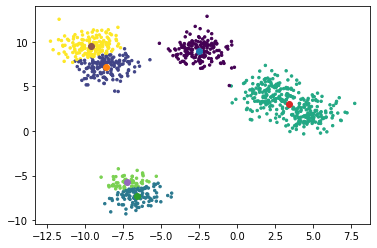

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=6,c=model.labels_)
for cluster in model.clusters:
    plt.scatter(cluster.center[0], cluster.center[1])

    

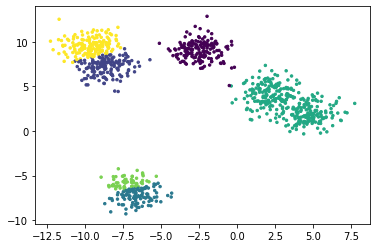

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=6,c=model.labels_)


In [27]:
errors

NameError: name 'errors' is not defined